### Imports + Loading Data:

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import ast

In [55]:
BERT_bank_df = pd.read_csv("BERT_bank.csv")
BERT_bank_df = BERT_bank_df.drop(BERT_bank_df.columns[0], axis=1)
BERT_bank_df["All Predictions"] = BERT_bank_df["All Predictions"].apply(ast.literal_eval)

In [56]:
out_of_topic_manual = pd.read_csv("out_of_topic_final.csv")
errors_raw = BERT_bank_df[(BERT_bank_df["Assigned label"] != BERT_bank_df["Cluster label"])]
out_of_topic_raw = BERT_bank_df[(BERT_bank_df["Assigned label"] != BERT_bank_df["Cluster label"]) & (BERT_bank_df["Assigned topic name"] != BERT_bank_df["Cluster topic name"])]
in_topic_raw = BERT_bank_df[(BERT_bank_df["Assigned label"] != BERT_bank_df["Cluster label"]) & (BERT_bank_df["Assigned topic name"] == BERT_bank_df["Cluster topic name"])]

In [63]:
len(errors_raw[errors_raw["Cluster label"].isna()])

11

In [68]:
outliers = errors_raw[errors_raw["Cluster label"].isna()]
# outliers

In [ ]:
errors_raw.dropna(inplace=True)
in_topic_raw.dropna(inplace=True)
out_of_topic_raw.dropna(inplace=True)

In [4]:
print("Total Number of Errors where predicted != cluster:",len(errors_raw),"\n")
print("Number of Out of Topic Errors where predicted != cluster:",len(out_of_topic_raw),"\n")
print("Number of In Topic Errors where predicted != cluster:",len(in_topic_raw))

Total Number of Errors where predicted != cluster: 212 

Number of Out of Topic Errors where predicted != cluster: 83 

Number of In Topic Errors where predicted != cluster: 129


### Out of Topic Errors:

In [77]:
out_of_topic_df = pd.read_csv("out_of_topic_final.csv")
out_of_topic_df.loc[out_of_topic_df["Error Reason"] == "Both Incorrect", "Error Reason"] = "Mislabel and Model Error"

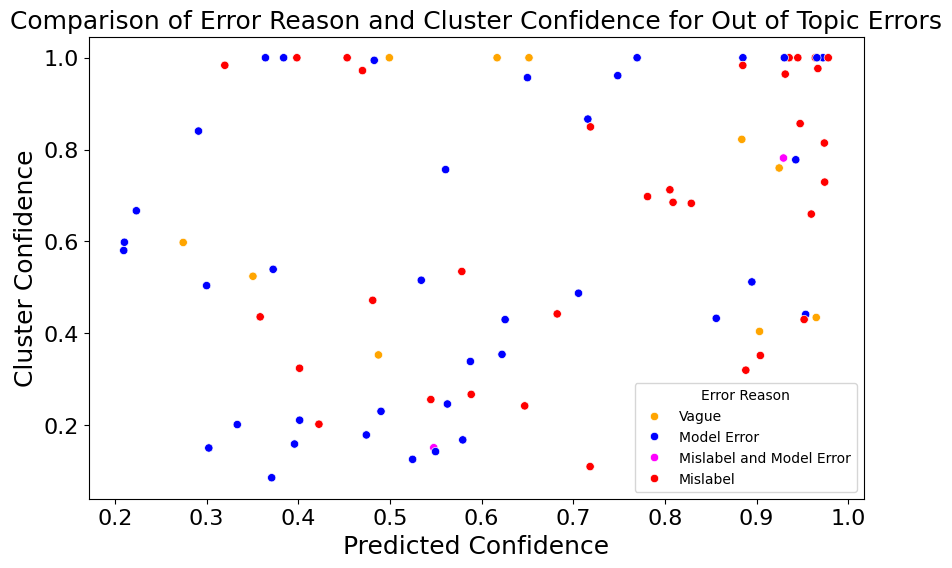

In [83]:
plt.figure(figsize=(10, 6))

error_reason_palette = {"Mislabel": "red", "Model Error": "blue", "Vague": "orange","Mislabel and Model Error": "magenta"}

sns.scatterplot(data=out_of_topic_df, x="Predicted confidence", y="Cluster confidence", hue="Error Reason", palette = error_reason_palette)
plt.legend(title="Error Reason")

plt.title('Comparison of Error Reason and Cluster Confidence for Out of Topic Errors', fontsize=18)

plt.xlabel('Predicted Confidence', fontsize=18)
plt.ylabel('Cluster Confidence', fontsize=18)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# plt.savefig('cluster_confidence_scatter_out.png', dpi=300)

plt.show()

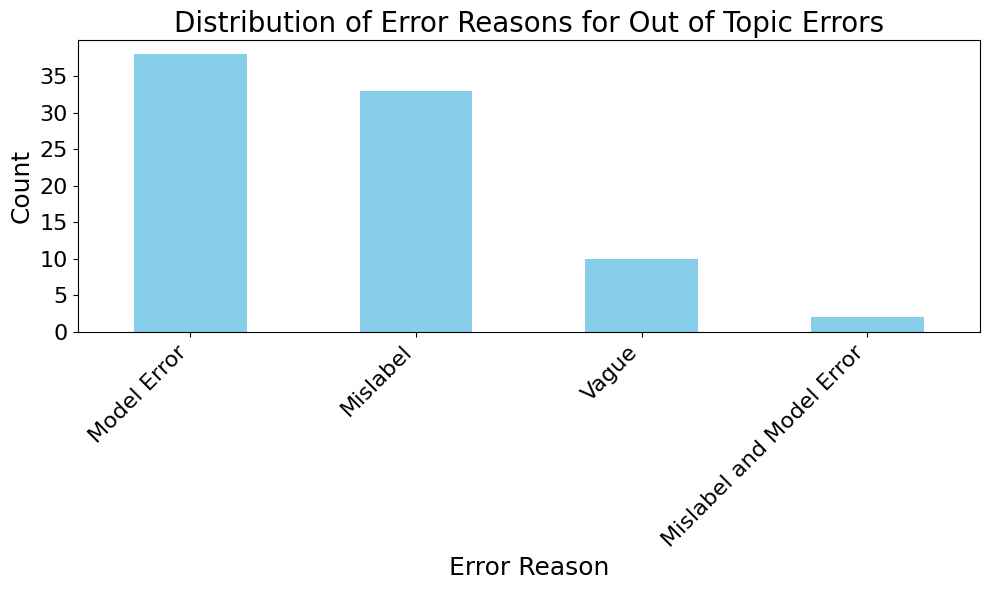

In [84]:
error_counts_out = out_of_topic_df['Error Reason'].value_counts()

plt.figure(figsize=(10, 6))
error_counts_out.plot(kind='bar', color='skyblue')

plt.title('Distribution of Error Reasons for Out of Topic Errors', fontsize=20)

plt.xlabel('Error Reason', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.xticks(rotation=45, ha='right', fontsize=16)
plt.yticks(fontsize=16)

plt.tight_layout()

plt.savefig('error_reasons_distribution_out.png', dpi=300)

plt.show()

In [85]:
error_counts_out = out_of_topic_df['Error Reason'].value_counts()
error_counts_out

Error Reason
Model Error                 38
Mislabel                    33
Vague                       10
Mislabel and Model Error     2
Name: count, dtype: int64

In [86]:
bins = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

mislabels_out = out_of_topic_df[out_of_topic_df['Error Reason'] == "Mislabel"].copy()
mislabels_out['cluster_bins'] = pd.cut(mislabels_out['Cluster confidence'], bins)
mislabel_bins_out = mislabels_out['cluster_bins'].value_counts(sort=False)


model_error_out = out_of_topic_df[out_of_topic_df['Error Reason'] == "Model Error"].copy()
model_error_out['cluster_bins'] = pd.cut(model_error_out['Cluster confidence'], bins)
model_error_bins_out = model_error_out['cluster_bins'].value_counts(sort=False)

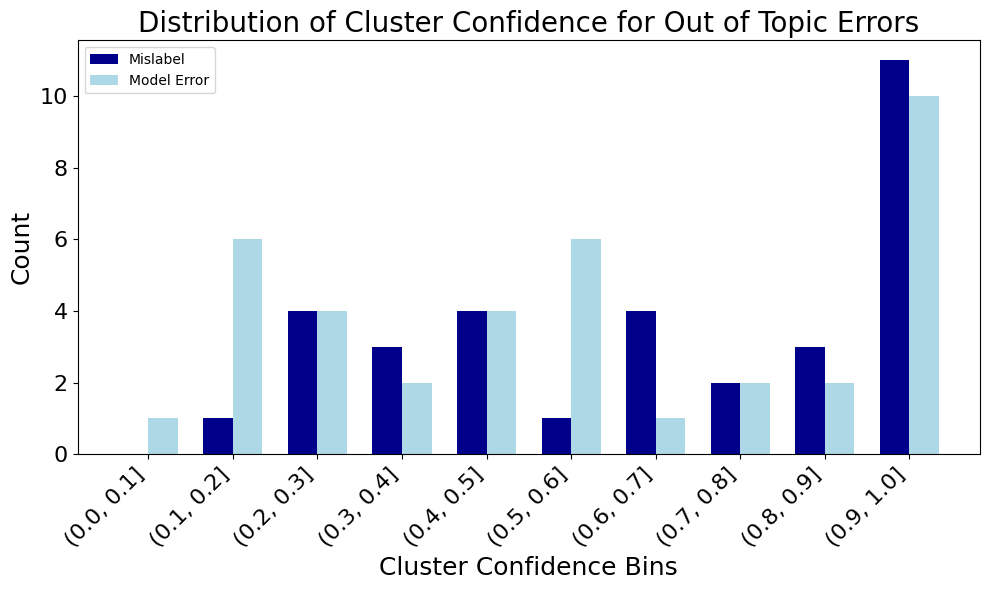

In [87]:
bar_width = 0.35
index = range(len(mislabel_bins_out))
plt.figure(figsize=(10, 6))
plt.bar(index, mislabel_bins_out, bar_width, color='darkblue', label='Mislabel')
plt.bar([i + bar_width for i in index], model_error_bins_out, bar_width, color='lightblue', label='Model Error')

plt.title('Distribution of Cluster Confidence for Out of Topic Errors', fontsize=20)

plt.xlabel('Cluster Confidence Bins', fontsize=18)
plt.ylabel('Count', fontsize=18)

plt.xticks([i + bar_width / 2 for i in index], [str(bin) for bin in mislabel_bins_out.index], rotation=45, ha='right')

plt.xticks(rotation=45, ha='right', fontsize=16)
plt.yticks(fontsize=16)

plt.legend()

plt.tight_layout()

plt.savefig('cluster_bins_out.png', dpi=300)

plt.show()

### In Topic Errors:

In [89]:
within_topic_df = pd.read_csv("in_topic_final.csv")
within_topic_df.loc[40, "Error Reason"] = "Both Incorrect"
within_topic_df.loc[within_topic_df["Error Reason"] == "Both Incorrect", "Error Reason"] = "Mislabel and Model Error"

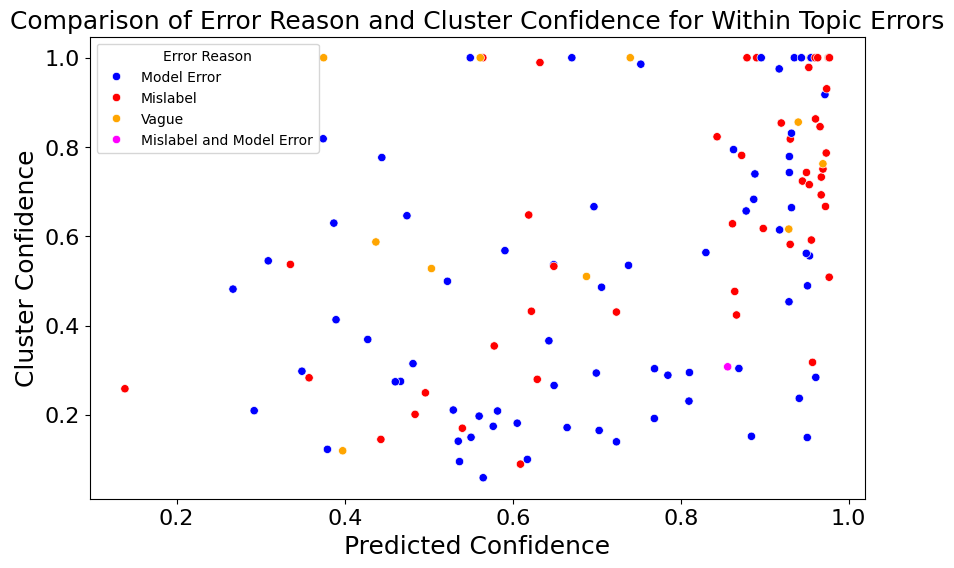

In [90]:
plt.figure(figsize=(10, 6))

sns.scatterplot(data=within_topic_df, x="Predicted confidence", y="Cluster confidence", hue="Error Reason", palette=error_reason_palette)
plt.legend(title="Error Reason")

plt.title('Comparison of Error Reason and Cluster Confidence for Within Topic Errors', fontsize=18)

plt.xlabel('Predicted Confidence', fontsize=18)
plt.ylabel('Cluster Confidence', fontsize=18)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.savefig('cluster_confidence_scatter_in.png', dpi=300)

plt.show()

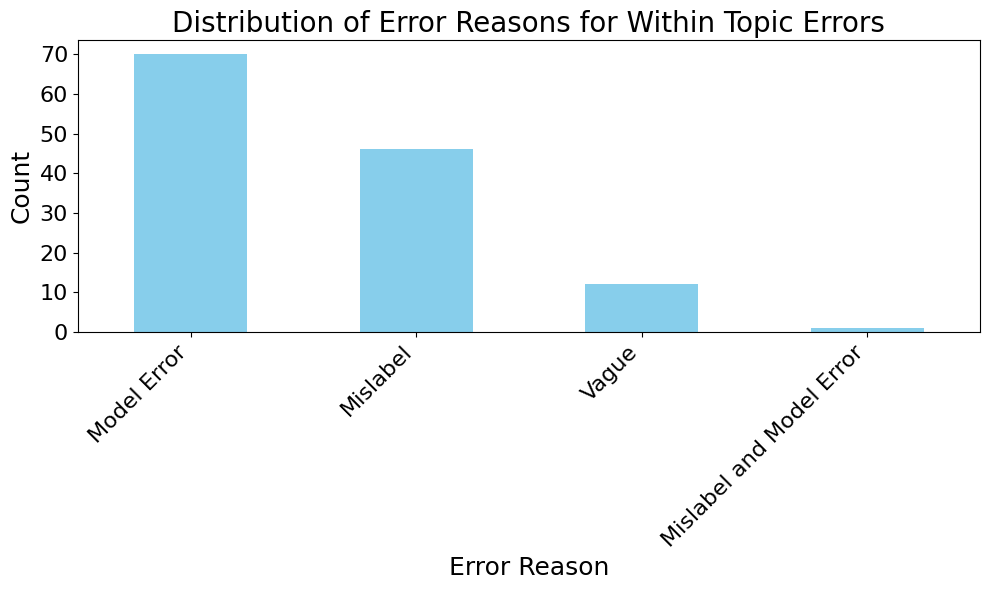

In [91]:
error_counts_in = within_topic_df['Error Reason'].value_counts()

plt.figure(figsize=(10, 6))

error_counts_in.plot(kind='bar', color='skyblue')
plt.title('Distribution of Error Reasons for Within Topic Errors', fontsize=20)

plt.xlabel('Error Reason', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.xticks(rotation=45, ha='right', fontsize=16)
plt.yticks(fontsize=16)

plt.tight_layout()

plt.savefig('error_reasons_distribution_in.png', dpi=300)

plt.show()


In [92]:
error_counts_in = within_topic_df['Error Reason'].value_counts()
error_counts_in

Error Reason
Model Error                 70
Mislabel                    46
Vague                       12
Mislabel and Model Error     1
Name: count, dtype: int64

In [93]:
bins = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

mislabels_in = within_topic_df[within_topic_df['Error Reason'] == "Mislabel"].copy()
mislabels_in['cluster_bins'] = pd.cut(mislabels_in['Cluster confidence'], bins)
mislabel_bins_in = mislabels_in['cluster_bins'].value_counts(sort=False)

model_error_in = within_topic_df[within_topic_df['Error Reason'] == "Model Error"].copy()
model_error_in['cluster_bins'] = pd.cut(model_error_in['Cluster confidence'], bins)
model_error_bins_in = model_error_in['cluster_bins'].value_counts(sort=False)

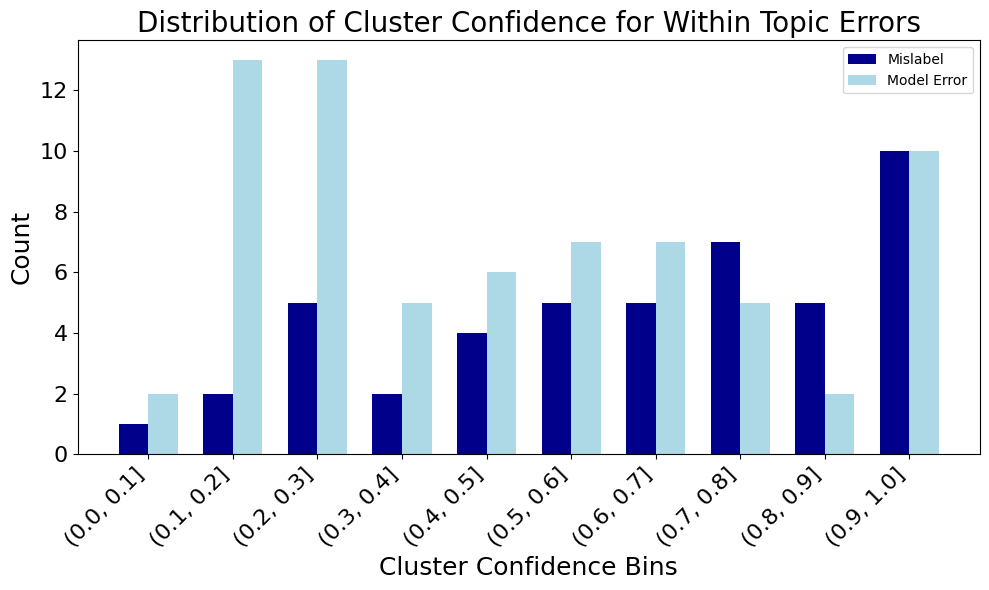

In [94]:
bar_width = 0.35
index = range(len(mislabel_bins_in))
plt.figure(figsize=(10, 6))
plt.bar(index, mislabel_bins_in, bar_width, color='darkblue', label='Mislabel')
plt.bar([i + bar_width for i in index], model_error_bins_in, bar_width, color='lightblue', label='Model Error')

plt.title('Distribution of Cluster Confidence for Within Topic Errors', fontsize=20)

plt.xlabel('Cluster Confidence Bins', fontsize=18)
plt.ylabel('Count', fontsize=18)

plt.xticks([i + bar_width / 2 for i in index], [str(bin) for bin in mislabel_bins_in.index], rotation=45, ha='right')

plt.xticks(rotation=45, ha='right', fontsize=16)
plt.yticks(fontsize=16)

plt.legend()

plt.tight_layout()

plt.savefig('cluster_bins_in.png', dpi=300)

plt.show()

### All Errors:

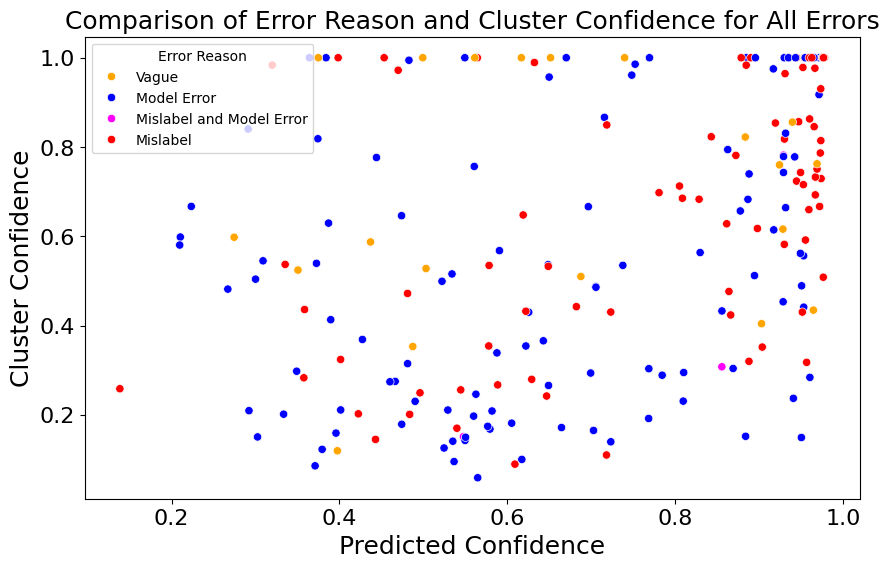

In [95]:
plt.figure(figsize=(10, 6))

all_errors_df = pd.concat([out_of_topic_df, within_topic_df], ignore_index=True)

sns.scatterplot(data=all_errors_df, x="Predicted confidence", y="Cluster confidence", hue="Error Reason", palette=error_reason_palette)

plt.title('Comparison of Error Reason and Cluster Confidence for All Errors', fontsize=18)


plt.xlabel('Predicted Confidence', fontsize=18)
plt.ylabel('Cluster Confidence', fontsize=18)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.legend(title="Error Reason")

plt.savefig('cluster_confidence_scatter_all.png', dpi=300)

plt.show()

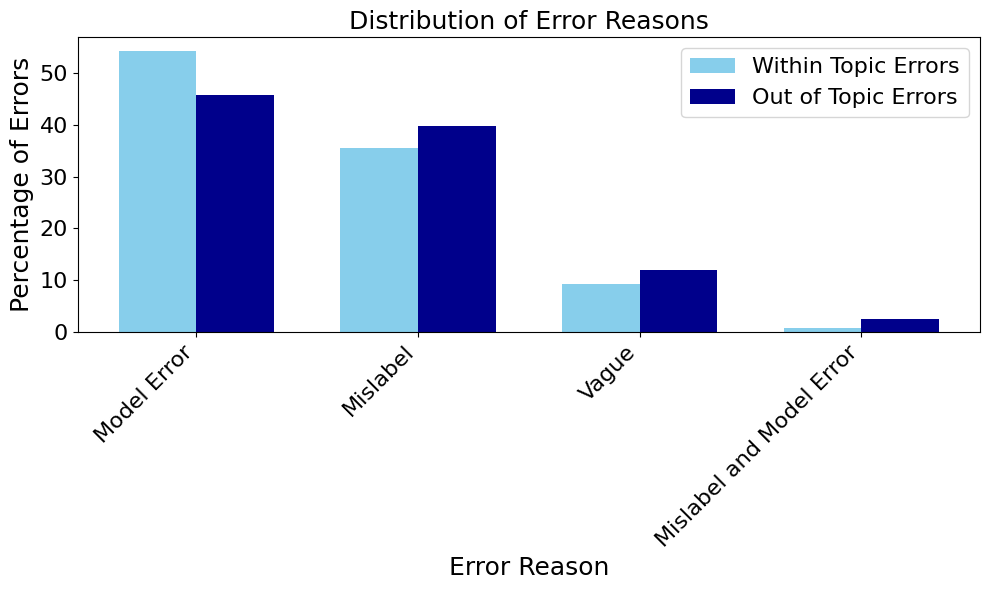

In [96]:
error_counts_in = within_topic_df['Error Reason'].value_counts()
error_counts_out = out_of_topic_df['Error Reason'].value_counts()

total_in = error_counts_in.sum()
total_out = error_counts_out.sum()

percentages_in = error_counts_in / total_in * 100
percentages_out = error_counts_out / total_out * 100

bar_width = 0.35
index = range(len(percentages_in))

plt.figure(figsize=(10, 6))
plt.bar(index, percentages_in, bar_width, color='skyblue', label='Within Topic Errors')
plt.bar([i + bar_width for i in index], percentages_out, bar_width, color='darkblue', label='Out of Topic Errors')

plt.title('Distribution of Error Reasons', fontsize=18)
plt.xlabel('Error Reason', fontsize=18)
plt.ylabel('Percentage of Errors', fontsize=18)
plt.xticks([i + bar_width / 2 for i in index], error_counts_in.index, rotation=45, ha='right')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.tight_layout()

plt.savefig('all_error_distribution.png', dpi=300)
plt.show()



### Correct Classifications:

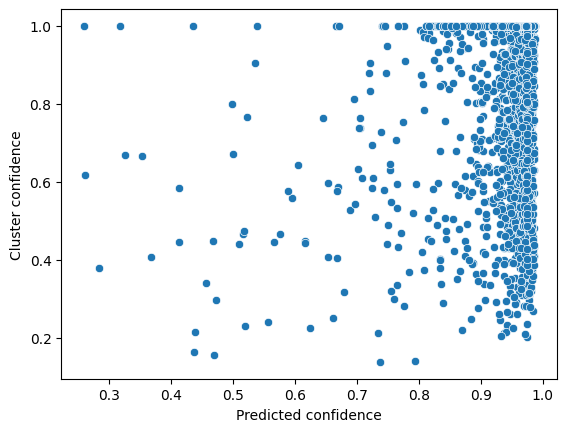

In [17]:
non_errors_df = BERT_bank_df[(BERT_bank_df["Assigned label"] == BERT_bank_df["Cluster label"]) & (BERT_bank_df["Assigned label"] == BERT_bank_df["Predicted label"]) ]

sns.scatterplot(data=non_errors_df, x="Predicted confidence", y="Cluster confidence")
plt.show()

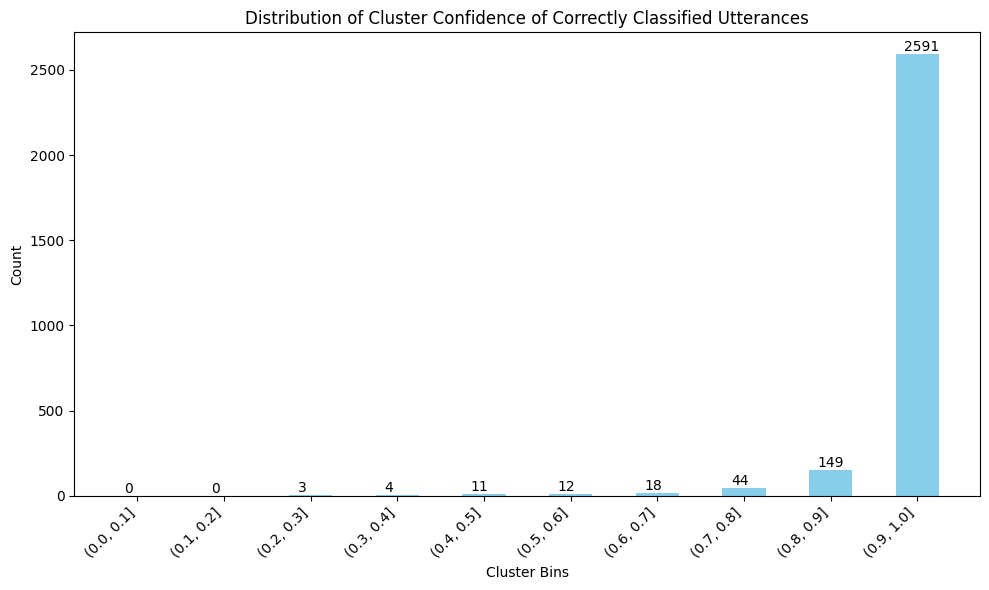

In [18]:
bins = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
correct_utt = non_errors_df.copy()
correct_utt['cluster_bins'] = pd.cut(correct_utt['Predicted confidence'], bins)

bins_correct = correct_utt['cluster_bins'].value_counts(sort=False)

bar_width = 0.5
index = range(len(bins_correct))
plt.figure(figsize=(10, 6))
bars = plt.bar(index, bins_correct, bar_width, color='skyblue')
plt.title('Distribution of Cluster Confidence of Correctly Classified Utterances')
plt.xlabel('Cluster Bins')
plt.ylabel('Count')
plt.xticks([i for i in index], [str(bin) for bin in bins_correct.index], rotation=45, ha='right')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2-0.15, yval, round(yval, 2), va='bottom')

plt.tight_layout()
plt.show()

In [19]:
len(non_errors_df)

2832

In [52]:
correct_df = non_errors_df.copy()
incorrect_df = all_errors_df.copy()
filtered_errors_df = all_errors_df[(all_errors_df["Error Reason"] != "Vague") & (all_errors_df["Error Reason"] != "Both Incorrect")]

correct_df["Error Reason"] = "No Error"
incorrect_df["Error Reason"] = "Error"

both_df = pd.concat([correct_df, incorrect_df], ignore_index=True)
both_df2 = pd.concat([correct_df, filtered_errors_df], ignore_index=True)


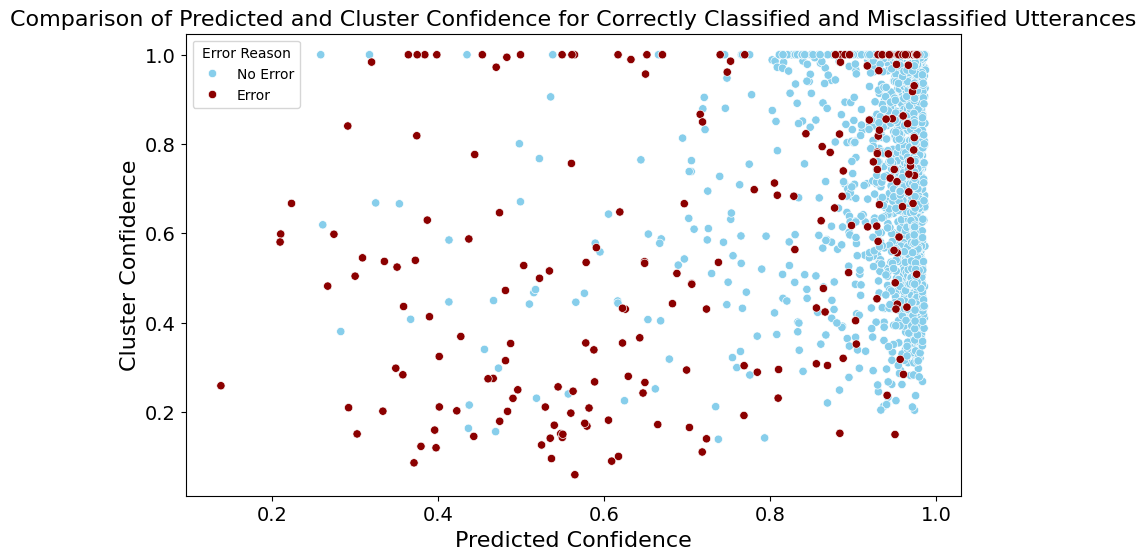

In [46]:
error_palette = {"Error": "darkred", "No Error": "skyblue"}

plt.figure(figsize=(10, 6))
sns.scatterplot(data=both_df, x="Predicted confidence", y="Cluster confidence", hue="Error Reason", palette=error_palette)

plt.title('Comparison of Predicted and Cluster Confidence for Correctly Classified and Misclassified Utterances', fontsize=16)
plt.xlabel('Predicted Confidence', fontsize=16)
plt.ylabel('Cluster Confidence', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(title="Error Reason")

# plt.savefig('cluster_confidence_scatter_all.png', dpi=300)
plt.show()

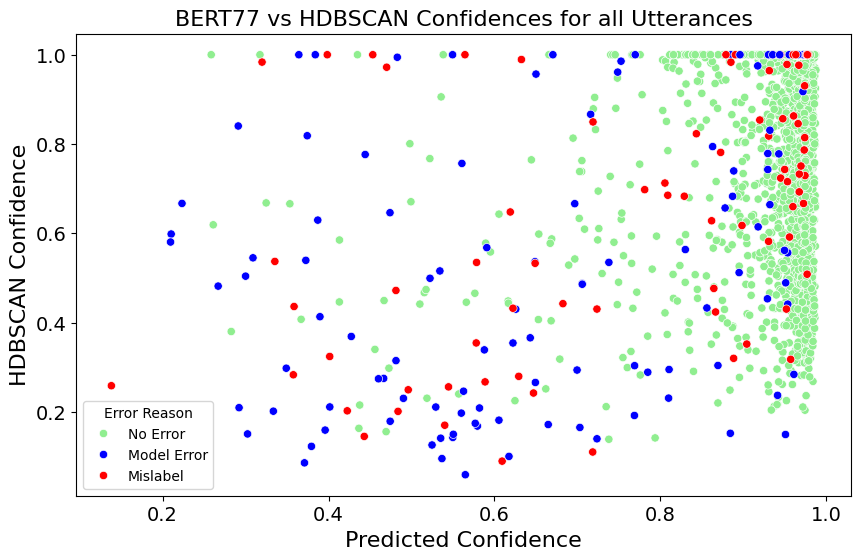

In [131]:
error_palette2 = {"No Error": "lightgreen", "Mislabel": "red", "Model Error":"blue"}

plt.figure(figsize=(10, 6))
sns.scatterplot(data=both_df2, x="Predicted confidence", y="Cluster confidence", hue="Error Reason", palette=error_palette2)

plt.title('BERT77 vs HDBSCAN Confidences for all Utterances', fontsize=16)
plt.xlabel('Predicted Confidence', fontsize=16)
plt.ylabel('HDBSCAN Confidence', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(title="Error Reason")

# plt.savefig('cluster_confidence_scatter_all.png', dpi=300)
plt.show()

### Files:

In [ ]:
# from google.colab import files
# files.download('error_reasons_distribution_in.png')
# files.download('error_reasons_distribution_out.png')
# files.download('cluster_confidence_scatter_in.png')
# files.download('cluster_confidence_scatter_out.png')
# files.download('cluster_confidence_scatter_all.png')
# files.download('cluster_bins_in.png')
# files.download('cluster_bins_out.png')

# Louvain:

In [126]:
all_louvain = pd.read_csv("louvain_all.csv")
incorrect_louvain = pd.read_csv("grouped_label.csv")

new_column_names = {
    'analysis_result': 'Error Reason',
    'text': 'utterance',
    'category': 'assigned_label',
    'primary_label': 'cluster_label'
}
columns_to_drop = ['assigned_topic', 'cluster_topic', 'Topic']
incorrect_louvain = incorrect_louvain.drop(columns=columns_to_drop)
incorrect_louvain = incorrect_louvain.rename(columns=new_column_names)
incorrect_louvain.loc[incorrect_louvain["Error Reason"] == "Mislabeled", "Error Reason"] = "Mislabel"

correct_louvain1 = all_louvain[(all_louvain["assigned_label"] == all_louvain["predicted_label"]) & (all_louvain["assigned_label"] == all_louvain["cluster_label"])]
correct_louvain = correct_louvain1.copy()
correct_louvain["Error Reason"] = "No Error"

incorrect_louvain_df = incorrect_louvain[(incorrect_louvain["Error Reason"] != "Vague") & (incorrect_louvain["Error Reason"] != "Both Incorrect")]

both_df3 = pd.concat([correct_louvain, incorrect_louvain_df], ignore_index=True)

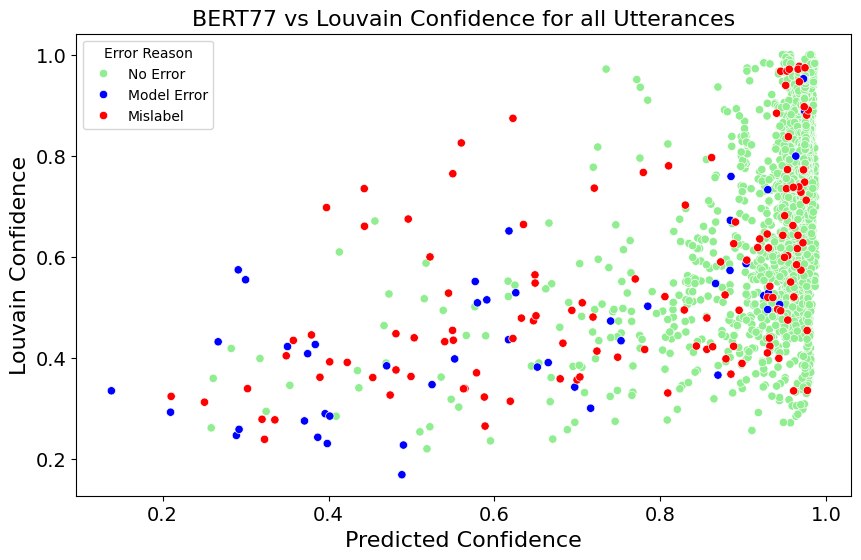

In [130]:
error_palette2 = {"No Error": "lightgreen", "Mislabel": "red", "Model Error":"blue"}

plt.figure(figsize=(10, 6))
sns.scatterplot(data=both_df3, x="predicted_confidence", y="cluster_confidence", hue="Error Reason", palette=error_palette2)

plt.title('BERT77 vs Louvain Confidences for all Utterances', fontsize=16)
plt.xlabel('Predicted Confidence', fontsize=16)
plt.ylabel('Louvain Confidence', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(title="Error Reason")

plt.show()

# Mismatches between Louvain and Hdbscan manual labels:

In [106]:
merged_df = pd.merge(all_errors_df, all_louvain[['text', 'primary_label','analysis_result']], left_on='Utterance', right_on='text', how='inner')
bias_data = merged_df[merged_df["Cluster label"] == merged_df["primary_label"]]
bias_data[bias_data["Error Reason"] != bias_data["analysis_result"]]

,Error Reason,Utterance,Assigned label,Predicted label,Predicted confidence,Cluster label,Cluster confidence,Assigned topic name,Predicted topic name,Cluster topic name,All Predictions,text,primary_label,analysis_result
0,Vague,Why am I being charged more ?,card_payment_wrong_exchange_rate,card_payment_fee_charged,0.903134,card_payment_fee_charged,0.404141,exchange_rate_currency,card_payment,card_payment,"[{'label': 'Refund_not_showing_up', 'score': 0...",Why am I being charged more ?,card_payment_fee_charged,Model Error
1,Vague,Where did this fee come from?,extra_charge_on_statement,card_payment_fee_charged,0.964972,card_payment_fee_charged,0.434481,transactions,card_payment,card_payment,"[{'label': 'Refund_not_showing_up', 'score': 7...",Where did this fee come from?,card_payment_fee_charged,Mislabeled
3,Mislabel and Model Error,"There is an incoming payment into my account, ...",fiat_currency_support,pending_card_payment,0.929246,pending_card_payment,0.781673,exchange_rate_currency,card_payment,card_payment,"[{'label': 'Refund_not_showing_up', 'score': 3...","There is an incoming payment into my account, ...",pending_card_payment,Model Error
6,Model Error,How would I use my money in a different country?,exchange_via_app,receiving_money,0.560737,receiving_money,0.756454,exchange_rate_currency,transactions,transactions,"[{'label': 'Refund_not_showing_up', 'score': 0...",How would I use my money in a different country?,receiving_money,Both Incorrect
7,Model Error,Is a copy of the police report necessary for c...,lost_or_stolen_card,verify_my_identity,0.622261,verify_my_identity,0.354120,new_card,identity_verification,identity_verification,"[{'label': 'Refund_not_showing_up', 'score': 0...",Is a copy of the police report necessary for c...,verify_my_identity,Mislabeled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,Model Error,Why don't I have my transfer?,balance_not_updated_after_bank_transfer,failed_transfer,0.829955,failed_transfer,0.563473,transfers,transfers,transfers,"[{'label': 'Refund_not_showing_up', 'score': 0...",Why don't I have my transfer?,failed_transfer,Mislabeled
164,Mislabel,whats your exchange rate,exchange_charge,exchange_rate,0.972351,exchange_rate,0.666724,exchange_rate_currency,exchange_rate_currency,exchange_rate_currency,"[{'label': 'Refund_not_showing_up', 'score': 0...",whats your exchange rate,exchange_rate,Mislabeled
165,Mislabel,Where do I find the exchange rate?,exchange_charge,exchange_rate,0.973205,exchange_rate,0.786531,exchange_rate_currency,exchange_rate_currency,exchange_rate_currency,"[{'label': 'Refund_not_showing_up', 'score': 0...",Where do I find the exchange rate?,exchange_rate,Mislabeled
167,Mislabel,Is it okay to use a bank card to top up,top_up_by_card_charge,topping_up_by_card,0.878880,topping_up_by_card,1.000000,top_up,top_up,top_up,"[{'label': 'Refund_not_showing_up', 'score': 6...",Is it okay to use a bank card to top up,topping_up_by_card,Mislabeled
